## Traveling Salesman

### Importing Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import randint as rnd
from random import shuffle

### Setting the Problem Parameters

In [2]:
N_Cities = 8
Area_Width = 500
Area_Hight = 500

### City Randomizer Function

In [3]:
def city_randomizer(n, w, h):
    offset = 20
    city_list = []
    for i in range(n):
        x = rnd(offset, w-offset)
        y = rnd(offset, h-offset)
        city_list.append([x, y])
    return city_list

### Draw Cities Function

In [4]:
def draw_cities(img, location_list, color):
    for city in location_list:
        img = cv2.circle(img, city, 10, color, -1)
    return img

### Path Converter Function

In [5]:
def converter(path, location_list):
    converted = []
    for i in path:
        converted.append(location_list[i])
    return converted

### Euclidean Distance Function

In [6]:
def distance_calculator(path):
    dis = 0
    for i in range(len(path)-1):
        dis += np.sqrt((path[i][0]-path[i+1][0])**2 + (path[i][1]-path[i+1][1])**2)
    return dis

### Draw Path Function

In [7]:
def draw_path(img, path, color):
    for i in range(len(path)-1):
        img = cv2.line(img, path[i], path[i+1], color, 2)
    return img

### Lexicographic Ordering

In [8]:
def swap(_list, index1, index2):
    _list[index1], _list[index2] = _list[index2], _list[index1]
    return _list

def all_paths(n):
    paths = []
    items = [i for i in range(n)]
    # paths.append(items)
    yield items
    
    while(True):
        #step_1
        largest_i = -1
        for i in range(len(items)-1):
            if items[i] < items[i+1]:
                largest_i = i
        if largest_i == -1:
            break
        #step_2
        largest_j = 0
        for j in range(len(items)):
            if items[largest_i] < items[j]:
                largest_j = j

        #step_3
        items = swap(items, largest_i, largest_j)

        #step_4
        left_half = items[:largest_i+1]
        right_half = items[largest_i+1:]
        right_half.reverse()
        items = left_half + right_half
    #     paths.append(items)
        
    # return paths
        yield items

### Main

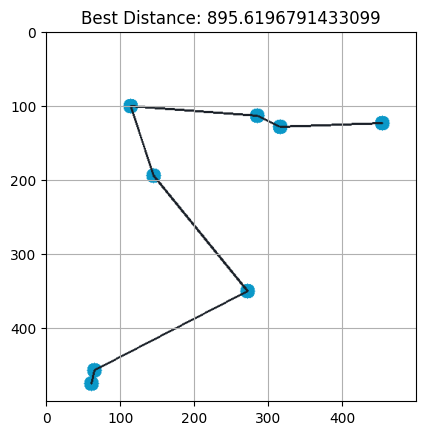

In [9]:
if __name__=="__main__":
    area = np.full((Area_Width, Area_Hight, 3), 255, np.uint8)
    cities_locations = city_randomizer(N_Cities, Area_Width, Area_Hight)
    area = draw_cities(area, cities_locations, (11, 152, 200))
    # paths = all_paths(N_Cities)

    best_distance = None
    best_path = []
    # for path in paths:
    for path in all_paths(N_Cities):
        new_path = converter(path, cities_locations)
        d = distance_calculator(new_path)
        if best_distance != None:
            if d<best_distance:
                best_distance = d
                best_path = new_path.copy()
        else:
            best_distance = d
            best_path = new_path.copy()
            
    area = draw_path(area, best_path, (26, 32, 40))

    plt.imshow(area)
    plt.title(f"Best Distance: {best_distance}")
    plt.grid()
    plt.show()  
